In [1]:
import torch
import torch.optim as optim
import torchvision
import matplotlib.pyplot as plt
import numpy as np

# 1. Genere datos de aprendizaje supervisado $Y_i = \sin(X_i) + \epsilon_i$ con $X_i \in \mathbb{R}$ y $\epsilon_i$: $\epsilon_i \overset{\text{i.i.d.}}{\sim} \text{Normal}(0, \sigma^2)$ con $\sigma$ de su elección y tamaño de muestra $n \in \{100, 1000, 5000\}$. Ajuste redes neuronales $\textit{feed-forward}$ eligiendo la profundidad y número de neuronas tales que el modelo no sobreajuste.
juste.pt.)*


Entrenando en: cuda
Epoch 1/50, Loss: 0.9576
Epoch 2/50, Loss: 0.8400
Epoch 3/50, Loss: 0.7835
Epoch 4/50, Loss: 0.6896
Epoch 5/50, Loss: 0.7014
Epoch 6/50, Loss: 0.6729
Epoch 7/50, Loss: 0.5931
Epoch 8/50, Loss: 0.5424
Epoch 9/50, Loss: 0.5373
Epoch 10/50, Loss: 0.5140
Epoch 11/50, Loss: 0.4673
Epoch 12/50, Loss: 0.4380
Epoch 13/50, Loss: 0.4116
Epoch 14/50, Loss: 0.3698
Epoch 15/50, Loss: 0.3378
Epoch 16/50, Loss: 0.3320
Epoch 17/50, Loss: 0.3173
Epoch 18/50, Loss: 0.3081
Epoch 19/50, Loss: 0.3173
Epoch 20/50, Loss: 0.3120
Epoch 21/50, Loss: 0.3152
Epoch 22/50, Loss: 0.3190
Epoch 23/50, Loss: 0.3085
Epoch 24/50, Loss: 0.3077
Epoch 25/50, Loss: 0.2962
Epoch 26/50, Loss: 0.2856
Epoch 27/50, Loss: 0.2805
Epoch 28/50, Loss: 0.2676
Epoch 29/50, Loss: 0.2650
Epoch 30/50, Loss: 0.2618
Epoch 31/50, Loss: 0.2608
Epoch 32/50, Loss: 0.2651
Epoch 33/50, Loss: 0.2615
Epoch 34/50, Loss: 0.2603
Epoch 35/50, Loss: 0.2559
Epoch 36/50, Loss: 0.2505
Epoch 37/50, Loss: 0.2487
Epoch 38/50, Loss: 0.2452
E

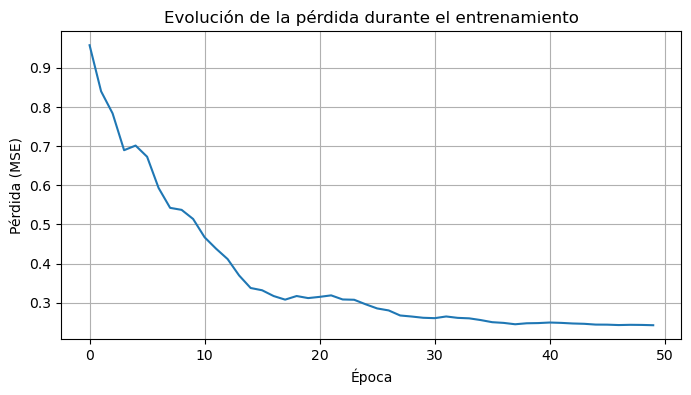

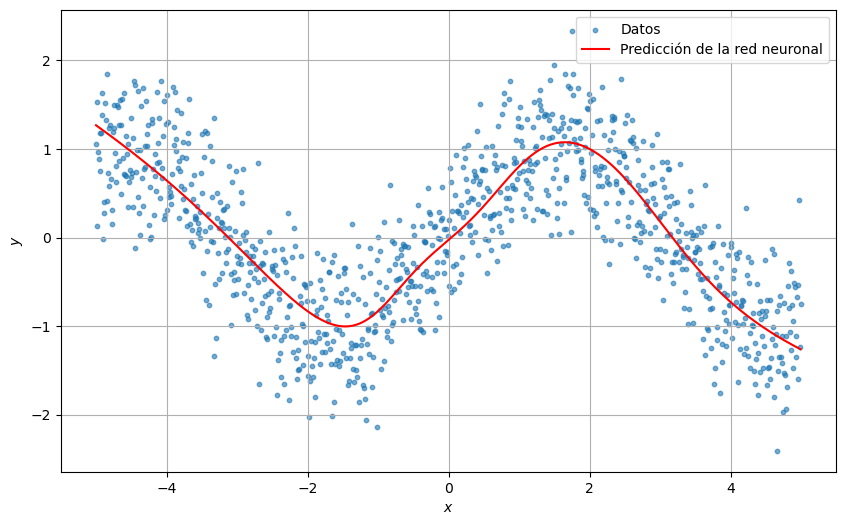

In [5]:
# Comprobar si hay GPU disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Datos generados
Norm = torch.distributions.Normal(0, 0.5)
e = Norm.sample(torch.Size([1000])).to(device)
X = torch.arange(-5, 5, 10 / 1000).unsqueeze(1).to(device)  # Mover a GPU
y = (torch.sin(X) + e.unsqueeze(1)).to(device)  # Mover a GPU

# Definir la red, el optimizador y la función de pérdida
class FFNet(torch.nn.Module):
    def __init__(self, hl_nn=10):
        super().__init__()
        self.hl_nn = hl_nn
        self.input_layer = torch.nn.Linear(1, self.hl_nn)
        self.hidden_layer = torch.nn.Linear(self.hl_nn, 1)

    def forward(self, x):
        x = torch.tanh(self.input_layer(x))
        x = self.hidden_layer(x)
        return x

model = FFNet(hl_nn=10).to(device)  # Mover el modelo a GPU
optimizer = optim.Adam(model.parameters(), lr=0.1)
criterion = torch.nn.MSELoss()

# Entrenamiento
epochs = 50
losses = []

for epoch in range(epochs):
    # Forward
    y_pred = model(X)
    loss = criterion(y_pred, y)
    losses.append(loss.item())

    # Backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# Visualización de la pérdida
plt.figure(figsize=(8, 4))
plt.plot(losses)
plt.title("Evolución de la pérdida durante el entrenamiento")
plt.xlabel("Época")
plt.ylabel("Pérdida (MSE)")
plt.grid()
plt.show()

# Visualización de los resultados
with torch.no_grad():
    y_pred = model(X).cpu()  # Mover las predicciones a CPU para graficar

X_cpu = X.cpu()  # Mover X a CPU para graficar
y_cpu = y.cpu()  # Mover y a CPU para graficar

plt.figure(figsize=(10, 6))
plt.scatter(X_cpu.numpy(), y_cpu.numpy(), label="Datos", alpha=0.6, s=10)
plt.plot(X_cpu.numpy(), y_pred.numpy(), color="red", label="Predicción de la red neuronal")
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.grid()
plt.show()


# 2. Implemente una red neuronal cuyo input sean imágenes y evalúe el ajuste del modelo

In [2]:
data_transforms = torchvision.transforms.Compose([
torchvision.transforms.Resize((224,224)),
torchvision.transforms.RandomHorizontalFlip(),
torchvision.transforms.RandomRotation(20),
torchvision.transforms.ToTensor(),
torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_data = torchvision.datasets.ImageFolder('imagenes/Training',
                                              transform=data_transforms)
train_loader = torch.utils.data.DataLoader(train_data,batch_size=20,shuffle=True)


test_data = torchvision.datasets.ImageFolder('imagenes/Testing',
                                              transform=data_transforms)
test_loader = torch.utils.data.DataLoader(test_data,batch_size=20,shuffle=False)


In [7]:
class ConvNN(torch.nn.Module):

    def __init__(self):
        super().__init__()
        self.normalize1_layer = torch.nn.BatchNorm2d(3)
        # self.normalize2_layer = torch.nn.BatchNorm2d(16)
        self.normalize3_layer = torch.nn.BatchNorm2d(32)
        #self.normalize4_layer = torch.nn.BatchNorm2d(8)

        #self.Droput1_layer = torch.nn.Dropout(0.5)
        #self.Droput2_layer = torch.nn.Dropout(0.4)

        
        self.conv1_layer = torch.nn.Conv2d(3,16,kernel_size=3,padding=2)
        self.maxpo1_layer = torch.nn.MaxPool2d(kernel_size=2,stride=2)
        
        self.conv2_layer = torch.nn.Conv2d(16,32,kernel_size=3,padding=2)
        self.maxpo2_layer = torch.nn.MaxPool2d(kernel_size=2,stride=2)


        self.flatten_layer = torch.nn.Flatten()

        self.fc1_layer = torch.nn.Linear(103968,128)
        self.fc2_layer = torch.nn.Linear(128,4)

    def forward(self,x):

        x = self.normalize1_layer(x)
        x = self.conv1_layer(x)
        x = self.maxpo1_layer(x)
        x = torch.functional.F.relu(x)
        
        
        x = self.conv2_layer(x)
        x = self.maxpo2_layer(x)
        x = torch.functional.F.relu(x)


        x = self.normalize3_layer(x)
        x = self.flatten_layer(x)

        
        x = self.fc1_layer(x)
        x = torch.functional.F.relu(x)


        x = self.fc2_layer(x)
        x = torch.functional.F.softmax(x)
        
        

        return x

        
        
        
        

In [213]:
#model = ConvNN().to(device)

C:\Users\Academica\AppData\Local\Temp\ipykernel_12736\717739728.py:53: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.functional.F.softmax(x)


torch.Size([31, 4])

In [11]:
# Asegurarnos de tener un dispositivo adecuado
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Crear una instancia del modelo
model = ConvNN().to(device)

# Definir el optimizador y la función de pérdida
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

# Función para entrenar el modelo
def train_model(model, train_loader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            
            # Reiniciar gradientes
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            # Backward pass y optimización
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            predicted = outputs.argmax(dim=1)
            total += labels.size(0)
            correct += torch.sum(predicted == labels).item()
        
        # Estadísticas de entrenamiento por época
        epoch_loss = running_loss / len(train_loader)
        epoch_accuracy = 100 * correct / total
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%')


# Entrenamiento y evaluación
epochs = 20
train_model(model, train_loader, criterion, optimizer, epochs)
# evaluate_model(model, test_loader)


C:\Users\Academica\AppData\Local\Temp\ipykernel_14964\164650295.py:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.functional.F.softmax(x)


Epoch [1/20], Loss: 1.0285, Accuracy: 71.03%
Epoch [2/20], Loss: 0.9555, Accuracy: 78.58%
Epoch [3/20], Loss: 0.9274, Accuracy: 81.32%
Epoch [4/20], Loss: 0.9288, Accuracy: 81.31%
Epoch [5/20], Loss: 0.9109, Accuracy: 83.06%
Epoch [6/20], Loss: 0.9056, Accuracy: 83.60%
Epoch [7/20], Loss: 0.9044, Accuracy: 83.65%
Epoch [8/20], Loss: 0.8910, Accuracy: 84.98%
Epoch [9/20], Loss: 0.8816, Accuracy: 86.00%
Epoch [10/20], Loss: 0.8733, Accuracy: 86.89%
Epoch [11/20], Loss: 0.8700, Accuracy: 87.22%
Epoch [12/20], Loss: 0.8656, Accuracy: 87.69%
Epoch [13/20], Loss: 0.8601, Accuracy: 88.22%
Epoch [14/20], Loss: 0.8581, Accuracy: 88.39%
Epoch [15/20], Loss: 0.8525, Accuracy: 89.03%
Epoch [16/20], Loss: 0.8497, Accuracy: 89.34%
Epoch [17/20], Loss: 0.8457, Accuracy: 89.60%
Epoch [18/20], Loss: 0.8437, Accuracy: 89.90%
Epoch [19/20], Loss: 0.8481, Accuracy: 89.36%
Epoch [20/20], Loss: 0.8402, Accuracy: 90.22%


In [12]:
# Función para evaluar el modelo en los datos de prueba
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs= model(images)
            predicted = outputs.argmax(dim=1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')

In [13]:
evaluate_model(model, test_loader)

C:\Users\Academica\AppData\Local\Temp\ipykernel_14964\164650295.py:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.functional.F.softmax(x)


Test Accuracy: 84.59%


In [18]:
torch.save(model.state_dict(), 'modelos/brain_tumor_cnn_model.pt')